<a href="https://colab.research.google.com/github/RajkumarGalaxy/ComputerVision/blob/master/Getting_Started_Computer_Vision_using_TF_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started Computer Vision Using TensorFlow Keras


We discuss Image Classification using TWO examples.
1. Fashion MNIST dataset (`tf.keras.datasets`)
2. Beans dataset (`tensorflow_datasets`)


References:

https://www.tensorflow.org/tutorials/images/cnn

https://www.tensorflow.org/api_docs/python/tf



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Fashion MNIST data from Keras Datasets

In [57]:
fashion_data = keras.datasets.fashion_mnist.load_data()
(x_train,y_train),(x_val,y_val)= fashion_data

In [45]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [46]:
x_val.shape ,y_val.shape

((10000, 28, 28), (10000,))

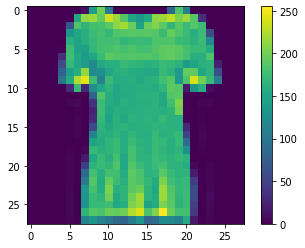

In [48]:
plt.imshow(x_train[10])
plt.colorbar()
plt.show()

In [58]:
x_train = x_train/255.0
x_val = x_val/255.0

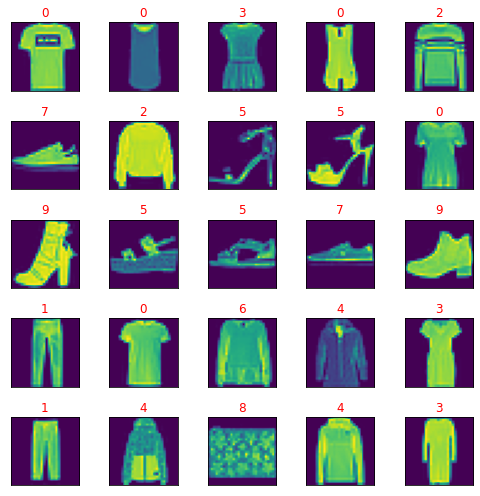

In [59]:
plt.figure(figsize=(7,7))
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.imshow(x_train[i])
  plt.title(y_train[i],color='r')
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show() 

In [51]:
x_train = tf.expand_dims(x_train, axis=-1)
x_val = tf.expand_dims(x_val, axis=-1)

Model building and Training

In [52]:
classifier = keras.models.Sequential([# convolution layer
                                      keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                      # flattening layer
                                      keras.layers.Flatten(),
                                      # dense hidden layer
                                      keras.layers.Dense(128, activation='relu'),
                                      # dense output layer
                                      keras.layers.Dense(10,activation='softmax')
])

In [53]:
x_train.shape

TensorShape([60000, 28, 28, 1])

In [54]:
classifier.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [55]:
history = classifier.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.4766 - accuracy: 0.8312 - val_loss: 0.3106 - val_accuracy: 0.8824
Epoch 2/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.2402 - accuracy: 0.9099 - val_loss: 0.2720 - val_accuracy: 0.9001
Epoch 3/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.1729 - accuracy: 0.9360 - val_loss: 0.2862 - val_accuracy: 0.9019
Epoch 4/10
1875/1875 [==============================] - 128s 69ms/step - loss: 0.1235 - accuracy: 0.9543 - val_loss: 0.3128 - val_accuracy: 0.9004
Epoch 5/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0931 - accuracy: 0.9667 - val_loss: 0.3294 - val_accuracy: 0.9031
Epoch 6/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0635 - accuracy: 0.9776 - val_loss: 0.3570 - val_accuracy: 0.9102
Epoch 7/10
1875/1875 [==============================] - 130s 70ms/step - loss: 0.0463 - accuracy: 0.9841 - val_loss: 0

Performance Analysis

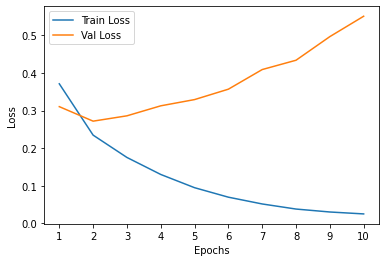

In [61]:
hist = pd.DataFrame(history.history)
epochs = np.arange(1,11)
plt.plot(epochs,hist['loss'], label='Train Loss')
plt.plot(epochs,hist['val_loss'], label='Val Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.show()

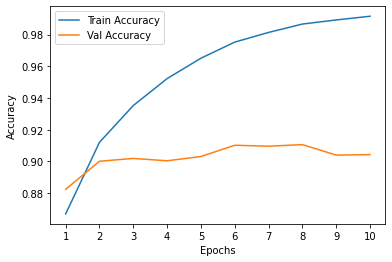

In [62]:
epochs = np.arange(1,11)
plt.plot(epochs,hist['accuracy'], label='Train Accuracy')
plt.plot(epochs,hist['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(epochs)
plt.show()

## Load BEANS dataset from TENSORFLOW_DATASETS

In [83]:
data, meta = tfds.load('beans',
                 as_supervised=True,
                 with_info=True,
                 )

In [156]:
train, val, test = data['train'], data['validation'], data['test']

In [161]:
ex = next(iter(test))
ex[0].numpy()[0][0]

array([141, 152,  96], dtype=uint8)

In [104]:
label_extractor = meta.features['label'].int2str

1
bean_rust
(500, 500, 3)


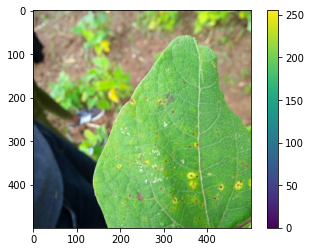

In [105]:
for example,label in train.take(1):
  print(label.numpy())
  print(label_extractor(label))
  print(example.shape)
  plt.imshow(example)
  plt.colorbar()
  plt.show()

In [162]:
def normalize(img, label):
  img = tf.cast(img, tf.float32)
  img = img/255.0
  img = tf.image.resize(img,(160,160))
  return img,label

In [163]:
train = train.map(normalize)
val = val.map(normalize)
test = test.map(normalize)

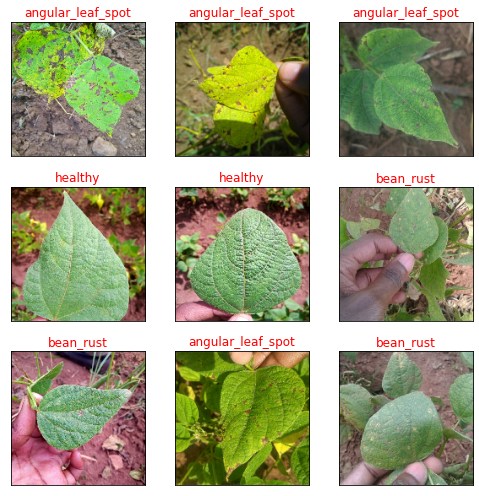

In [108]:
plt.figure(figsize=(7,7))
i = 1
for example,label in train.skip(10).take(9):
  plt.subplot(3,3,i)
  plt.title(label_extractor(label),color='r')
  plt.imshow(example)
  plt.xticks([])
  plt.yticks([])
  i += 1
plt.tight_layout()
plt.show()

In [164]:
train_batch = train.shuffle(1000).batch(64)
val_batch = val.batch(64)
test_batch = test.batch(64)

Modeling and Training

In [110]:
base = keras.models.Sequential([
                               keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=[160,160,3]),
                               keras.layers.MaxPooling2D((2,2)),
                               keras.layers.Conv2D(128,(3,3),strides=2, activation='relu', kernel_regularizer='l1_l2'),
                               keras.layers.MaxPooling2D((2,2)),
                               keras.layers.Conv2D(128,(3,3),strides=2, activation='relu', kernel_regularizer='l1_l2'),                               
])

In [111]:
head = keras.models.Sequential([
                                keras.layers.Flatten(),
                                keras.layers.Dense(128,activation='relu'),
                                keras.layers.Dropout(0.5),
                                keras.layers.Dense(64,activation='relu'),
                                keras.layers.Dense(3,activation='softmax')
])

In [112]:
model = keras.models.Sequential([base,head])

In [113]:
base.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 158, 158, 64)      1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 79, 79, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 39, 39, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 9, 9, 128)         147584    
Total params: 223,232
Trainable params: 223,232
Non-trainable params: 0
_________________________________________________________________


In [114]:
head.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               1327232   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 195       
Total params: 1,335,683
Trainable params: 1,335,683
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_16 (Sequential)   (None, 9, 9, 128)         223232    
_________________________________________________________________
sequential_17 (Sequential)   (None, 3)                 1335683   
Total params: 1,558,915
Trainable params: 1,558,915
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [117]:
history = model.fit(train_batch, validation_data=val_batch, epochs=40)

Epoch 1/40
17/17 [==============================] - 55s 3s/step - loss: 53.7182 - accuracy: 0.3899 - val_loss: 30.3448 - val_accuracy: 0.3383
Epoch 2/40
17/17 [==============================] - 43s 2s/step - loss: 24.8083 - accuracy: 0.3994 - val_loss: 11.1412 - val_accuracy: 0.5263
Epoch 3/40
17/17 [==============================] - 42s 2s/step - loss: 8.5869 - accuracy: 0.5019 - val_loss: 3.6215 - val_accuracy: 0.4135
Epoch 4/40
17/17 [==============================] - 43s 2s/step - loss: 3.1531 - accuracy: 0.4405 - val_loss: 2.0004 - val_accuracy: 0.5338
Epoch 5/40
17/17 [==============================] - 42s 2s/step - loss: 1.8451 - accuracy: 0.5275 - val_loss: 1.4162 - val_accuracy: 0.5639
Epoch 6/40
17/17 [==============================] - 42s 2s/step - loss: 1.4003 - accuracy: 0.5806 - val_loss: 1.2472 - val_accuracy: 0.5940
Epoch 7/40
17/17 [==============================] - 41s 2s/step - loss: 1.2835 - accuracy: 0.5603 - val_loss: 1.2500 - val_accuracy: 0.5714
Epoch 8/40
17/17

Performance Analysis

In [118]:
hist = pd.DataFrame(history.history)

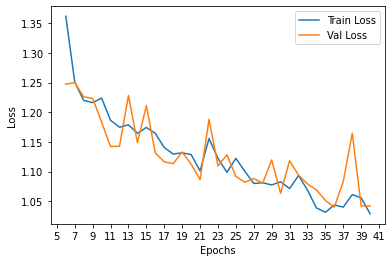

In [128]:
epochs = np.arange(6,41)
plt.plot(epochs,hist['loss'][5:], label='Train Loss')
plt.plot(epochs,hist['val_loss'][5:], label='Val Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks(np.arange(5,42,2))
plt.show()

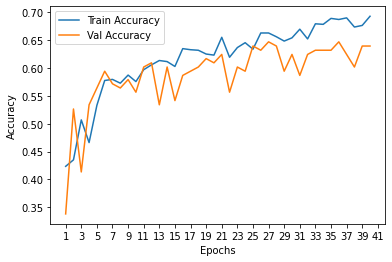

In [124]:
epochs = np.arange(1,41)
plt.plot(epochs,hist['accuracy'], label='Train Accuracy')
plt.plot(epochs,hist['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(np.arange(1,42,2))
plt.show()

In [121]:
print(hist.columns)

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')


Prediction on test data

In [183]:
preds = model.predict(test_batch)


In [166]:
preds.shape

(128, 3)

In [167]:
images,labels = next(iter(test_batch))

In [175]:
p = images[0]
print(p.shape)

(160, 160, 3)


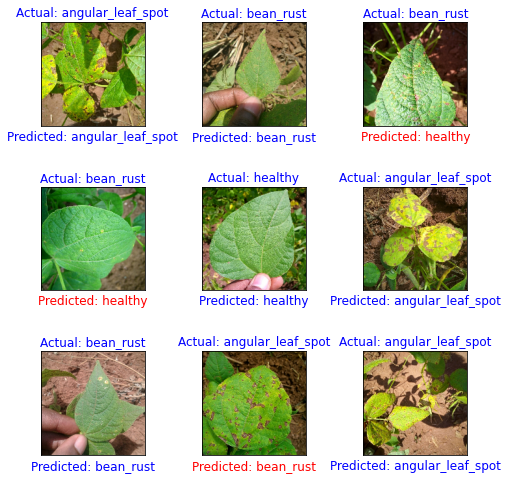

In [184]:
plt.figure(figsize=(7,7))

batch = next(iter(test_batch))
for i in range(9):
  plt.subplot(3,3,i+1)
  pred = np.argmax(preds[i])
  plt.title(f'Actual: {label_extractor(labels[i])}' ,color='b',size=12)
  if pred==labels[i]:
    plt.xlabel(f'Predicted: {label_extractor(pred)}', color='b',size=12)
  else:
    plt.xlabel(f'Predicted: {label_extractor(pred)}', color='r',size=12)
  plt.imshow(images[i])
  plt.xticks([])
  plt.yticks([])

plt.tight_layout()
plt.show()

Thank you for your time!